In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Documents\data_science ML\14th- l1, l2\11th- l1, l2\TASK-22_LASSO,RIDGE\car-mpg.csv")

In [3]:
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [4]:
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type',
       'car_name'],
      dtype='object')

In [6]:
df.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
car_name    0
dtype: int64

# data cleaning

In [7]:
# here in dataset it consist of '?' replace with nan values
df['origin'].unique()#[1,2,3]
df=df.drop(['car_name'],axis=1)
df

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


In [8]:
df['origin']=df['origin'].replace({1:'america',2:'europe',3:'india'})

In [9]:
df['origin']

0      america
1      america
2      america
3      america
4      america
        ...   
393    america
394     europe
395    america
396    america
397    america
Name: origin, Length: 398, dtype: object

In [10]:

# Then create dummies and convert to int
df = pd.get_dummies(df, columns=['origin'],dtype=int)

In [11]:
df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


In [12]:
df.head(50)

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
5,15.0,8,429.0,198,4341,10.0,70,0,1,0,0
6,14.0,8,454.0,220,4354,9.0,70,0,1,0,0
7,14.0,8,440.0,215,4312,8.5,70,0,1,0,0
8,14.0,8,455.0,225,4425,10.0,70,0,1,0,0
9,15.0,8,390.0,190,3850,8.5,70,0,1,0,0


In [13]:
# in 32 coloumn  we see ? 

In [14]:
df=df.replace('?',np.nan)
df.head(34)

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
5,15.0,8,429.0,198,4341,10.0,70,0,1,0,0
6,14.0,8,454.0,220,4354,9.0,70,0,1,0,0
7,14.0,8,440.0,215,4312,8.5,70,0,1,0,0
8,14.0,8,455.0,225,4425,10.0,70,0,1,0,0
9,15.0,8,390.0,190,3850,8.5,70,0,1,0,0


In [15]:
from sklearn.impute  import SimpleImputer
imputer=SimpleImputer(strategy='median')
df[['hp']]=imputer.fit_transform(df[['hp']])

df

In [16]:
df.head(34)

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0
5,15.0,8,429.0,198.0,4341,10.0,70,0,1,0,0
6,14.0,8,454.0,220.0,4354,9.0,70,0,1,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,0,1,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,0,1,0,0
9,15.0,8,390.0,190.0,3850,8.5,70,0,1,0,0


In [17]:
df['hp']=df['hp'].astype('int')

In [18]:
df

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,0,0
394,44.0,4,97.0,52,2130,24.6,82,1,0,1,0
395,32.0,4,135.0,84,2295,11.6,82,1,1,0,0
396,28.0,4,120.0,79,2625,18.6,82,1,1,0,0


# Model Building

In [19]:
x=df.drop(['mpg'],axis=1)
y=df[['mpg']]

In [20]:
x

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,8,307.0,130,3504,12.0,70,0,1,0,0
1,8,350.0,165,3693,11.5,70,0,1,0,0
2,8,318.0,150,3436,11.0,70,0,1,0,0
3,8,304.0,150,3433,12.0,70,0,1,0,0
4,8,302.0,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86,2790,15.6,82,1,1,0,0
394,4,97.0,52,2130,24.6,82,1,0,1,0
395,4,135.0,84,2295,11.6,82,1,1,0,0
396,4,120.0,79,2625,18.6,82,1,1,0,0


In [21]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [22]:
# Standard Scalaer for x
from sklearn.preprocessing import StandardScaler
x_scaler=StandardScaler()
x_s=x_scaler.fit_transform(x)
x_s=pd.DataFrame(x_s,columns=x.columns)
x_s

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,1.498191,1.090604,0.673277,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
1,1.498191,1.503514,1.590065,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
2,1.498191,1.196232,1.197156,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
3,1.498191,1.061796,1.197156,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
4,1.498191,1.042591,0.935216,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
...,...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.513026,-0.479257,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.461968,-0.497643
394,-0.856321,-0.925936,-1.369851,-0.993671,3.279296,1.621983,0.941412,-1.292726,2.164651,-0.497643
395,-0.856321,-0.561039,-0.531645,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.461968,-0.497643
396,-0.856321,-0.705077,-0.662615,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.461968,-0.497643


In [23]:
from sklearn.preprocessing import StandardScaler
y_scaler=StandardScaler()
y_s=y_scaler.fit_transform(y)
y_s=pd.DataFrame(y_s,columns=y.columns)

In [24]:
y_s

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y_s,train_size=0.80,random_state=9)

# LinearRegression

In [26]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
model=LinearRegression()
model_LR=model.fit(x_train,y_train)
for idx,col_name in enumerate(x_train.columns):
    print('The Cofficirnt {} is{}'.format(col_name,model_LR.coef_[0][idx]))
print("Intercept is",model_LR.intercept_[0])    
    

The Cofficirnt cyl is0.27439853522463137
The Cofficirnt disp is0.3065403405272374
The Cofficirnt hp is-0.11153979638728377
The Cofficirnt wt is-0.7877284406775252
The Cofficirnt acc is0.05374905639848912
The Cofficirnt yr is0.35921609369551016
The Cofficirnt car_type is0.32650071543438275
The Cofficirnt origin_america is-0.08020136987977582
The Cofficirnt origin_europe is0.03361030706097476
The Cofficirnt origin_india is0.06523072407288649
Intercept is 0.004965857092865832


# Regularized Ride Regression

In [27]:
model_ridge=Ridge(alpha=0.3)
model_ridge.fit(x_train,y_train)

Ridge(alpha=0.3)

In [28]:
print("Cofficient are",model_ridge.coef_)

Cofficient are [[ 0.27097204  0.29644387 -0.11340679 -0.77649087  0.05142666  0.35801398
   0.32396511 -0.07995534  0.03304534  0.06547147]]


# Regularization Lasso

In [29]:
model_lasso=Lasso(alpha=0.1)
model_lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [30]:
print("coffients are",model_lasso.coef_)

coffients are [-0.         -0.         -0.         -0.54138345  0.          0.26745269
  0.10570613 -0.04820039  0.          0.        ]


# Score Comparison/ r2/cofficient of determinant

In [31]:
print("Linear Regression",model_LR.score(x_train,y_train))
print("LinearRegression",model_LR.score(x_test,y_test))

Linear Regression 0.8442261236080982
LinearRegression 0.8250894078143821


# Ridge

In [32]:
print("Ridge regression",model_ridge.score(x_train,y_train))
print("Ridge Regression",model_ridge.score(x_test,y_test))

Ridge regression 0.844212809129912
Ridge Regression 0.8258335973192905


# Lasso

In [33]:
print("Lasso Regression",model_lasso.score(x_train,y_train))
print("Lasso Regression",model_lasso.score(x_test,y_test))


Lasso Regression 0.8057900357382383
Lasso Regression 0.8105478861036819


# model Tuning by Adjusted R2 
###### it used for to know  about the importance of feature selection how much it is dependent

In [34]:
data_train_test=pd.concat([x_train,y_train],axis=1)

In [35]:
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india,mpg
122,-0.856321,-0.695475,0.149398,-0.367029,-0.569341,-0.815074,0.941412,-1.292726,2.164651,-0.497643,0.062185
271,-0.856321,-0.359385,0.018428,-0.266530,0.410972,0.538847,0.941412,0.773559,-0.461968,-0.497643,-0.040298
326,-0.856321,-0.993154,-1.474627,-0.751291,2.952525,1.080415,0.941412,-1.292726,2.164651,-0.497643,2.547402
185,-0.856321,-0.916334,-0.662615,-0.845878,0.774051,-0.002721,0.941412,0.773559,-0.461968,-0.497643,0.318393
53,-0.856321,-1.175603,-1.029330,-1.415768,1.246054,-1.356642,0.941412,-1.292726,-0.461968,2.009471,0.958913


In [46]:
ols1 = smf.ols(
    formula='mpg ~ cyl + disp + hp + wt + C(car_type) + origin_america',
    data=data_train_test
).fit()

# Print coefficients
print(ols1.params)

Intercept                           -0.392392
C(car_type)[T.0.9414116656227584]    0.752459
cyl                                  0.342107
disp                                 0.080189
hp                                  -0.332369
wt                                  -0.569886
origin_america                      -0.087880
dtype: float64


In [47]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           2.38e-87
Time:                        00:10:56   Log-Likelihood:                -235.03
No. Observations:                 318   AIC:                             484.1
Df Residuals:                     311   BIC:                             510.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [50]:
df=df.drop(['disp'],axis=1)

In [51]:
df

,mpg,cyl,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,18.0,8,130,3504,12.0,70,0,1,0,0
1,15.0,8,165,3693,11.5,70,0,1,0,0
2,18.0,8,150,3436,11.0,70,0,1,0,0
3,16.0,8,150,3433,12.0,70,0,1,0,0
4,17.0,8,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,86,2790,15.6,82,1,1,0,0
394,44.0,4,52,2130,24.6,82,1,0,1,0
395,32.0,4,84,2295,11.6,82,1,1,0,0
396,28.0,4,79,2625,18.6,82,1,1,0,0


# After

In [60]:
x=df.drop(['mpg'],axis=1)
y=df[['mpg']]

In [61]:
x

,cyl,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,8,130,3504,12.0,70,0,1,0,0
1,8,165,3693,11.5,70,0,1,0,0
2,8,150,3436,11.0,70,0,1,0,0
3,8,150,3433,12.0,70,0,1,0,0
4,8,140,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,86,2790,15.6,82,1,1,0,0
394,4,52,2130,24.6,82,1,0,1,0
395,4,84,2295,11.6,82,1,1,0,0
396,4,79,2625,18.6,82,1,1,0,0


In [62]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [63]:
# Standard Scalaer for x
from sklearn.preprocessing import StandardScaler
x_scaler=StandardScaler()
x_s=x_scaler.fit_transform(x)
x_s=pd.DataFrame(x_s,columns=x.columns)
x_s

,cyl,hp,wt,acc,yr,car_type,origin_america,origin_europe,origin_india
0,1.498191,0.673277,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
1,1.498191,1.590065,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
2,1.498191,1.197156,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
3,1.498191,1.197156,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
4,1.498191,0.935216,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.461968,-0.497643
...,...,...,...,...,...,...,...,...,...
393,-0.856321,-0.479257,-0.213324,0.011586,1.621983,0.941412,0.773559,-0.461968,-0.497643
394,-0.856321,-1.369851,-0.993671,3.279296,1.621983,0.941412,-1.292726,2.164651,-0.497643
395,-0.856321,-0.531645,-0.798585,-1.440730,1.621983,0.941412,0.773559,-0.461968,-0.497643
396,-0.856321,-0.662615,-0.408411,1.100822,1.621983,0.941412,0.773559,-0.461968,-0.497643


In [64]:
from sklearn.preprocessing import StandardScaler
y_scaler=StandardScaler()
y_s=y_scaler.fit_transform(y)
y_s=pd.DataFrame(y_s,columns=y.columns)

In [65]:
y_s

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543
...,...
393,0.446497
394,2.624265
395,1.087017
396,0.574601


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_s,y_s,train_size=0.80)

In [68]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
model=LinearRegression()
model_LR=model.fit(x_train,y_train)
for idx,col_name in enumerate(x_train.columns):
    print('The Cofficirnt {} is{}'.format(col_name,model_LR.coef_[0][idx]))
print("Intercept is",model_LR.intercept_[0])    
    

The Cofficirnt cyl is0.4040363601854347
The Cofficirnt hp is-0.13638328970052685
The Cofficirnt wt is-0.6031517097006035
The Cofficirnt acc is0.012155941689564935
The Cofficirnt yr is0.35068210349634243
The Cofficirnt car_type is0.36139223999538583
The Cofficirnt origin_america is-0.05522788199957498
The Cofficirnt origin_europe is0.01557135453706874
The Cofficirnt origin_india is0.052147518895471714
Intercept is -0.012193214763832536


In [70]:
print("Linear Regression",model_LR.score(x_train,y_train))
print("LinearRegression",model_LR.score(x_test,y_test))

Linear Regression 0.8275961749404424
LinearRegression 0.8697187952584291


In [79]:
y_pred=model.predict(x_test)

In [81]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)  # True y first, then predicted y
print(f"R² Score: {r2}")

R² Score: 0.8697187952584291


<Axes: xlabel='acc', ylabel='mpg'>

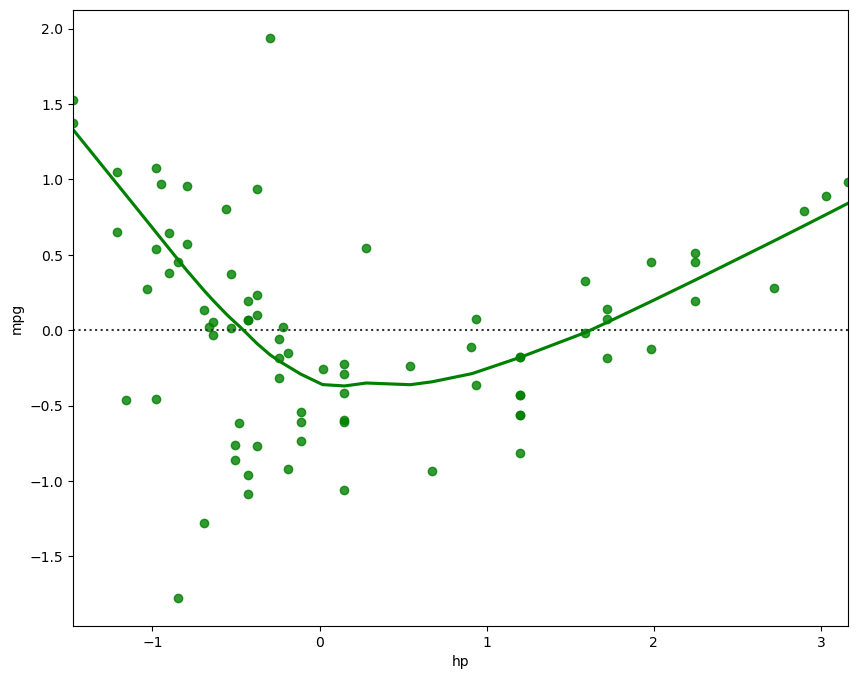

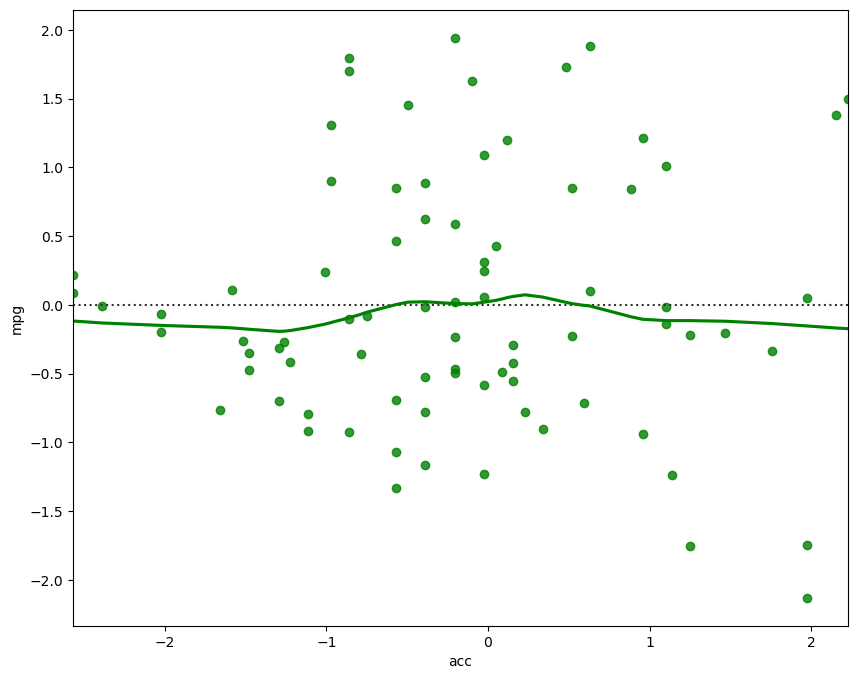

In [82]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['hp'], y= y_test['mpg'], color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= x_test['acc'], y= y_test['mpg'], color='green', lowess=True )

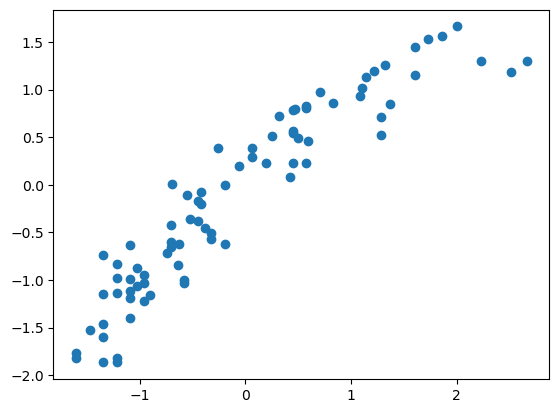

In [83]:
plt.scatter(y_test['mpg'], y_pred)